In [136]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
import cv2
import numpy as np
import rawpy
import imutils
from PIL import Image

import matplotlib.pyplot as plt

from photo.film import detect, show, crop, rotate, save

Image.MAX_IMAGE_PIXELS = None

# To dos
- Close rectangles (e.g., for very under-exposed areas near the edges of a frame)
  - See `epsilon` in `cv2.approxPolyDP`
- Add aspect ratio filter (area is not sufficient)


In [174]:
path = "/Users/dsuo/Downloads/2021-01-22-0002.tif"
fmt = "35"

DPI = 3200
working_dpi = 400
scaling = DPI // working_dpi

In [175]:
image = Image.open(path)
raw = np.array(image)
# rgb = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# with rawpy.imread(path) as raw:
#     rgb = raw.postprocess()

In [176]:
raw.shape

(30970, 18809, 3)

In [239]:
im = raw[::scaling, ::scaling, :]

In [178]:
im.shape

(3872, 2352, 3)

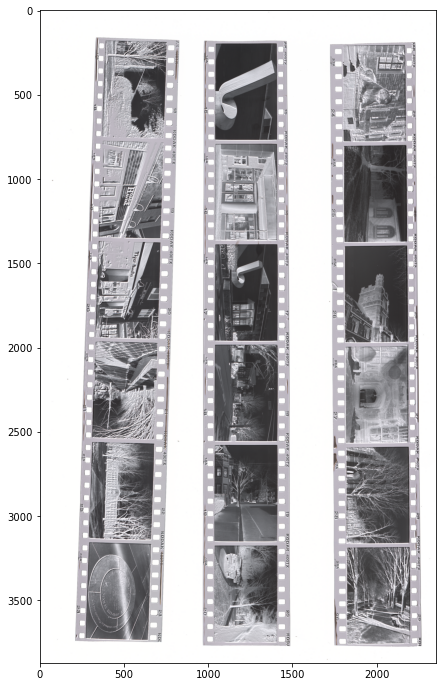

In [191]:
plt.figure(figsize=(16, 12))
plt.imshow(im)

  9%|▉         | 1/11 [00:00<00:02,  4.82it/s]

9100721.0


 18%|█▊        | 2/11 [00:00<00:02,  4.27it/s]

9100721.0


 27%|██▋       | 3/11 [00:00<00:02,  3.83it/s]

9100721.0


 36%|███▋      | 4/11 [00:01<00:01,  3.68it/s]

9100721.0


 45%|████▌     | 5/11 [00:01<00:01,  3.63it/s]

9100721.0


 55%|█████▍    | 6/11 [00:01<00:01,  3.58it/s]

9100721.0


 64%|██████▎   | 7/11 [00:01<00:01,  3.62it/s]

9100721.0


 73%|███████▎  | 8/11 [00:02<00:00,  3.72it/s]

9100721.0


 82%|████████▏ | 9/11 [00:02<00:00,  3.24it/s]

9100721.0


 91%|█████████ | 10/11 [00:03<00:00,  2.72it/s]

9100721.0
1859062.0389706045
1863729.0
1834035.3320307583


100%|██████████| 11/11 [00:03<00:00,  3.38it/s]

9100721.0
1860874.0699188262
1863729.0
1841263.568572238


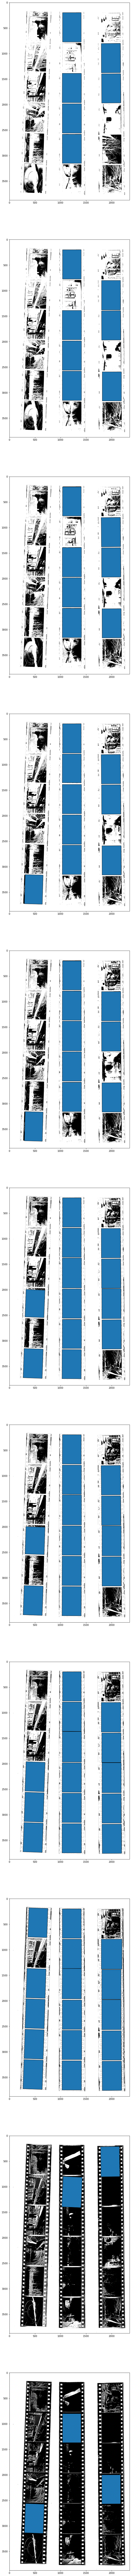

In [255]:
paths, rotations = detect(im,
                          fmt="35",
                          area_threshold=0.1,
                          thresholds=np.linspace(100, 200, 11),
                          dpi=working_dpi,
                          verbose=True,
                          use_tqdm=True)

In [256]:
len(paths)

17

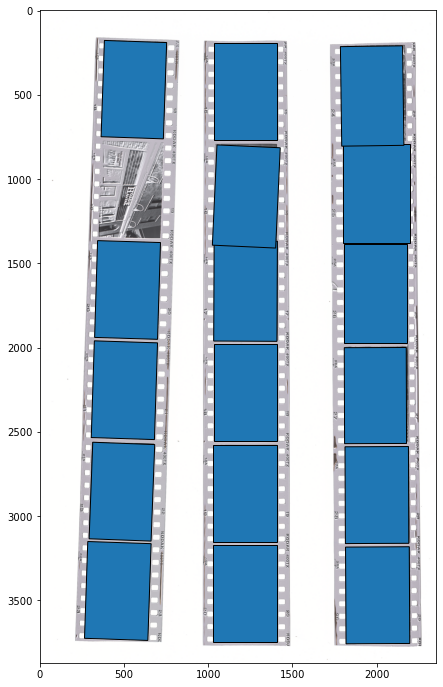

In [257]:
show(im, paths)

In [62]:
im = np.array(Image.open(path))

In [63]:
cropped = crop(im, [path * scaling for path in paths])

In [64]:
rotated = rotate(cropped, rotations)

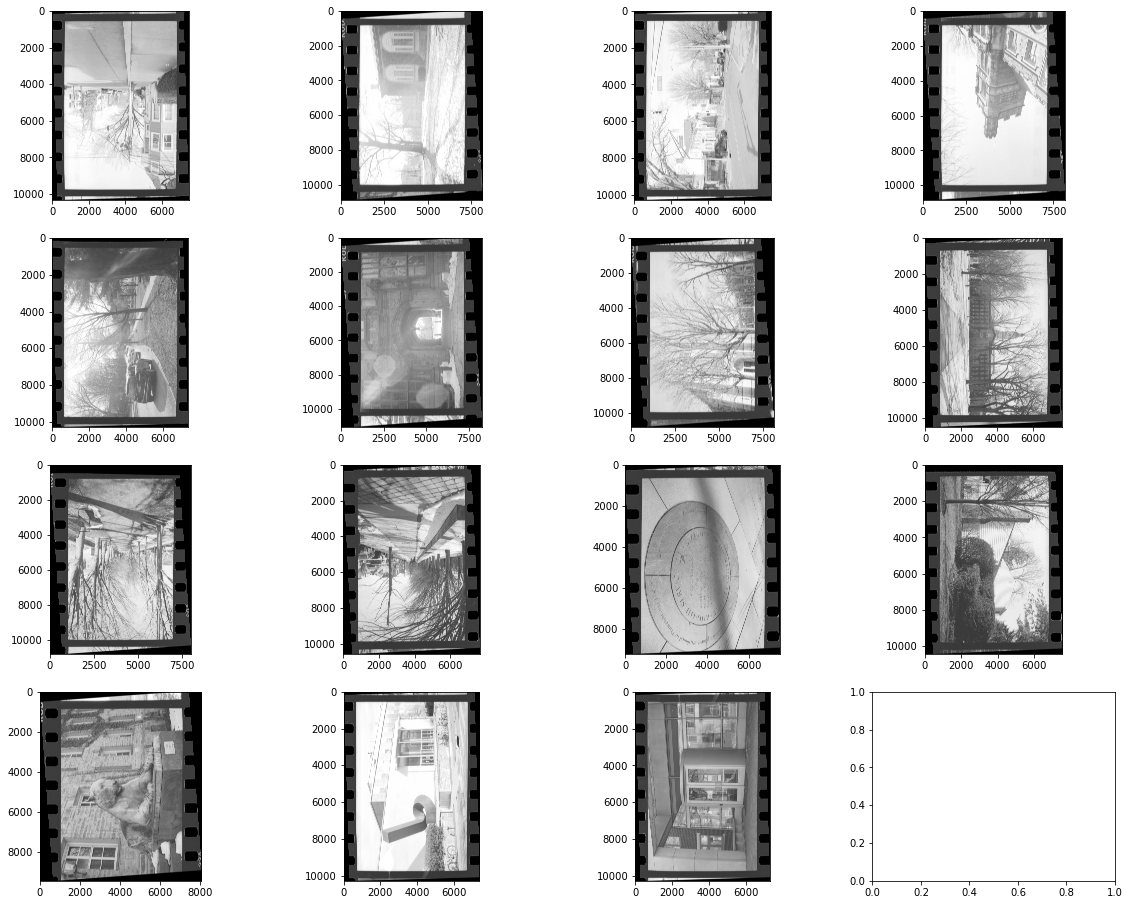

In [66]:
fig, axs = plt.subplots(len(rotated) // 4 + 1, 4, figsize=(20, 16))

for i, preview in enumerate(rotated):
    axs[i // 4, i % 4].imshow(preview, cmap="gray")

In [65]:
finals = []

for preview in rotated:
    p, r = detect(preview,  fmt="35", area_threshold=0.1, dpi=DPI)
    finals.append(crop(preview, p, width=36/25.4, height=24/25.4, pad=0.1, dpi=DPI)[0])

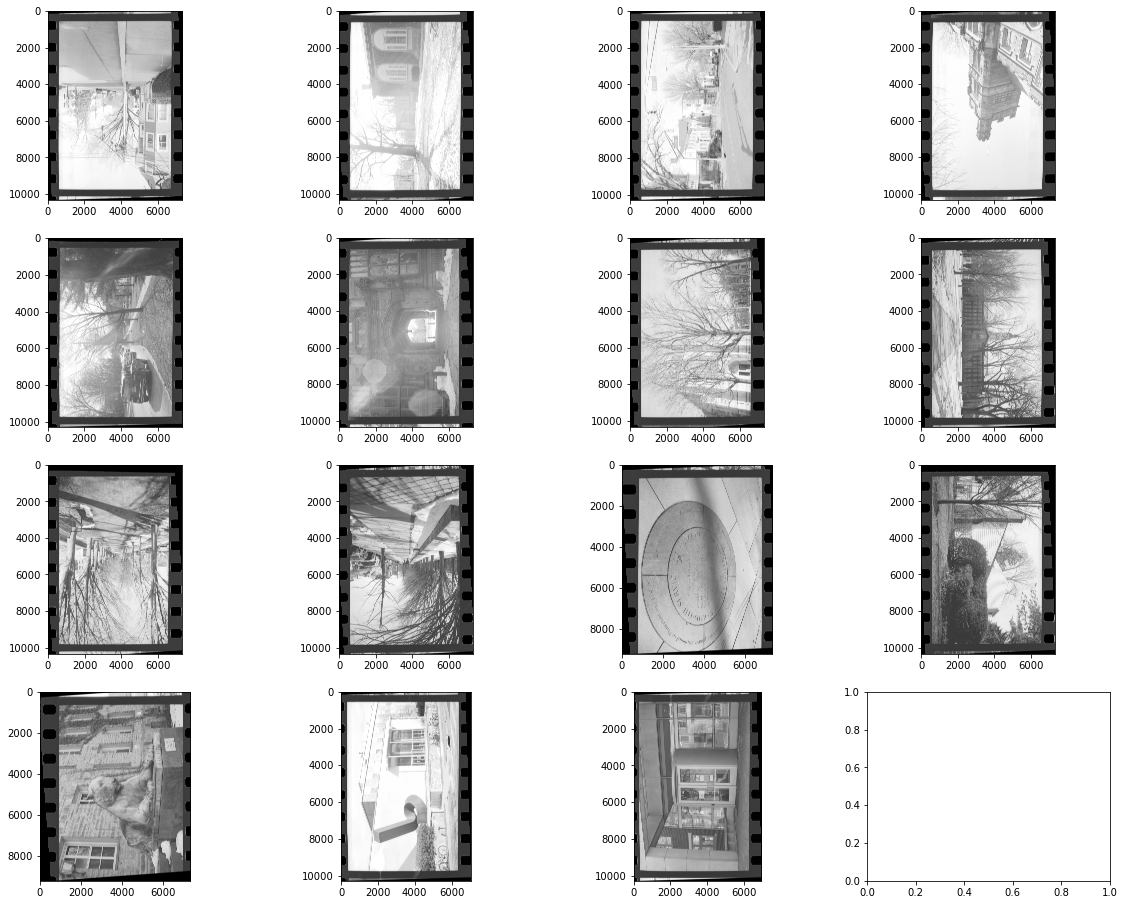

In [67]:
fig, axs = plt.subplots(len(finals) // 4 + 1, 4, figsize=(20, 16))

for i, final in enumerate(finals):
    axs[i // 4, i % 4].imshow(final, cmap="gray")

In [68]:
save(finals, "~/Downloads/test", format="jpeg")